In [1]:
import matplotlib.pyplot as plt
import numpy as np

from society.agent import TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


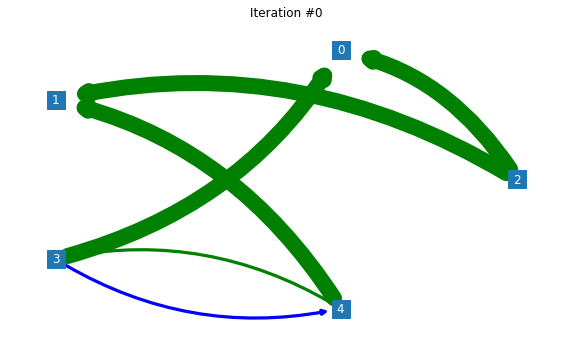

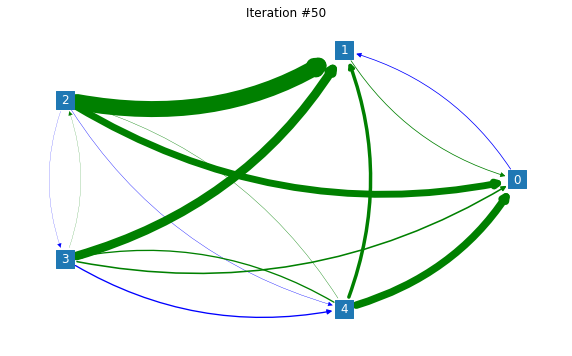

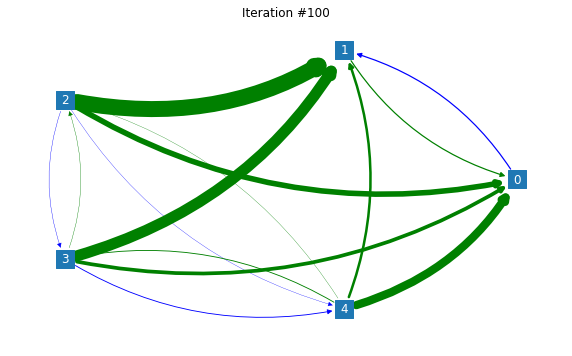

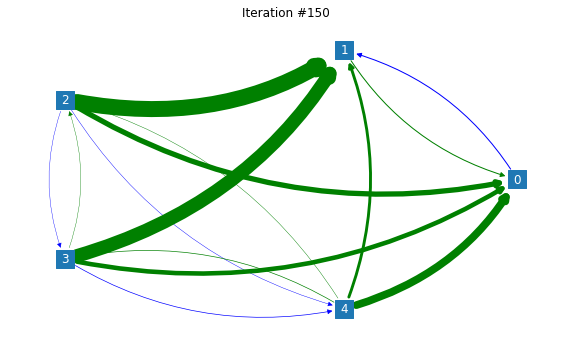

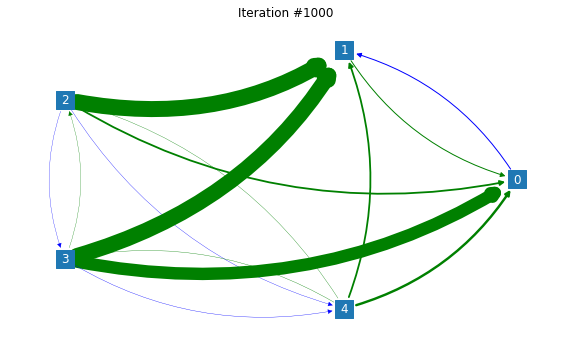

In [2]:
POPULATION = 5

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                 # 0
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                 # 1
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 2
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 3
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 4
]

for agent in agents:
    agent.selection_strategy._epsilon = 0.2

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(1001):
    sim.play_round()

    if (i < 200 and i % 50 == 0) or (i >= 200 and i % 1000 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4       
0: 0        27300    0        0        0        => 27300
1: 27300    0        0        0        0        => 27300
2: 50000    442000   0        8000     9000     => 509000
3: 343500   433500   8000     0        9500     => 794500
4: 67000    49500    9000     9500     0        => 135000


[3, 2, 4, 0, 1]


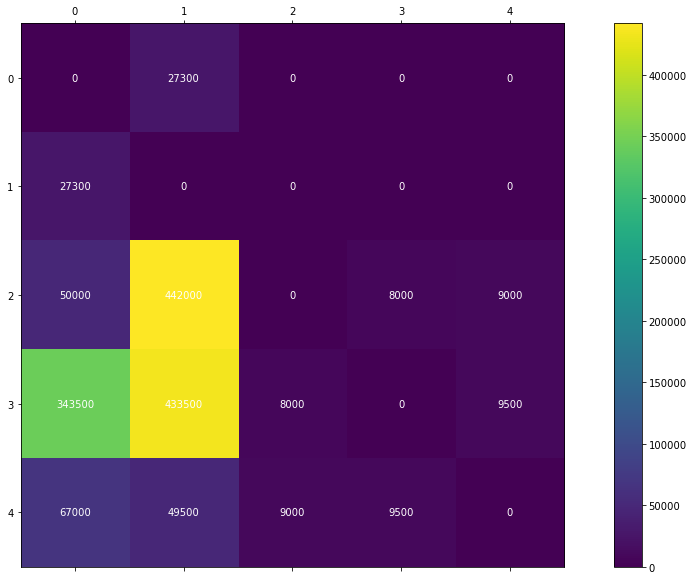

In [4]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]
ranked_partners = sorted(range(POPULATION), key=lambda i: sum(returns_matrix[i]), reverse=True)
print(ranked_partners)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
m = ax.matshow(returns_matrix)
fig.colorbar(m)

for (i, j), z in np.ndenumerate(returns_matrix):
    ax.text(
        j,
        i,
        "{:0.0f}".format(z),
        ha="center",
        va="center",
        color="white"
    ) # bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')


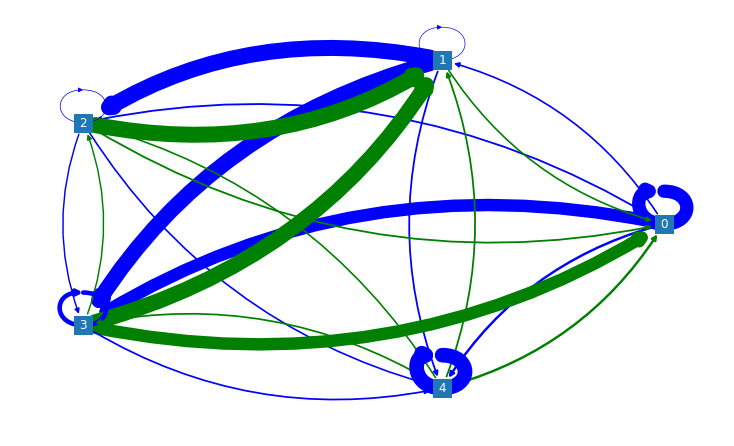

In [5]:
plot_graph(make_frequencies_graph(sim.returns))

In [6]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4       
0: 736      91       100      687      134      => 1748
1: 91       37       884      867      99       => 1978
2: 100      884      40       80       90       => 1194
3: 687      867      80       253      95       => 1982
4: 134      99       90       95       812      => 1230
